In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

# No crop but a bit zoomed

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO,max_zoom=1.1)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [6]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.062833   0.99564    0.710353  
    1      0.978628   0.955206   0.714953                       
    2      0.934347   0.934982   0.721013                       
    3      0.909596   0.92366    0.725686                       
    4      0.868669   0.911662   0.730286                       



[0.91166216, 0.73028621495327106]

In [7]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.802616   0.905788   0.731454  
    1      0.787324   0.904103   0.734594                       



[0.9041028, 0.73459404205607481]

In [8]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.798537   0.906259   0.734959  
    1      0.761674   0.88738    0.740654                       



[0.88737959, 0.74065420560747663]

In [9]:
learn.fit(0.005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.738014   0.892232   0.738537  
    1      0.723136   0.894261   0.738829                       
    2      0.633501   0.896387   0.744086                       
    3      0.666619   0.909098   0.739924                       



[0.90909761, 0.73992406542056077]

In [10]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.547094   0.885657   0.748832  
    1      0.524548   0.886252   0.749781                       
    2      0.520359   0.88947    0.750146                       
    3      0.535095   0.891122   0.752629                       
    4      0.47811    0.89374    0.751533                       



[0.8937397, 0.75153329439252337]

In [11]:
learn.fit(0.0005,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.490781   0.89338    0.75219   
    1      0.457055   0.902458   0.752409                       
    2      0.447903   0.894043   0.75219                        
    3      0.448538   0.897872   0.750584                       



[0.89787179, 0.75058411214953269]

In [12]:
learn.fit(0.0001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.439598   0.889196   0.753067  
    1      0.430478   0.897459   0.751971                       
    2      0.449599   0.904474   0.752117                       
    3      0.429707   0.89701    0.752921                       



[0.89701033, 0.75292056074766356]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization      
[[ 134    6    0    0    3   11   23   35   67    0   11    2   28    0    2   31    0    0   17    8    4
     1   71    0]
 [   1   58    0    0    0    1    0    1   20    0    5    1    5    0    0    1    2    0    0    1    0
     0   28    0]
 [   3    0   21    0    1    0    3    0    8    0    0    0    0    0    0    3    0    0    0    0    0
     0    6    0]
 [   1    0    0   31    0    0    0    1    0    0    0    0    0    0    0   10    0    0    3    0    0
     0    0    0]
 [   0    1    0    2  308    0    1    1    3    0    1    0    0    0    0  143    0    0   33    1    0
     1   18    0]
 [   9    1    0    0    1  119   19   26   29    0    9    0    2    0    0   14    3    0    1    4    0
     0   34    1]
 [   7    0    2    0    0    9  197    8   27    0    4    2    8    0    1   15    0    0    3    0    0
     0   24    0]
 [  16    0    1    4    5   18    9  207   14    0    1    1    2    2    0   

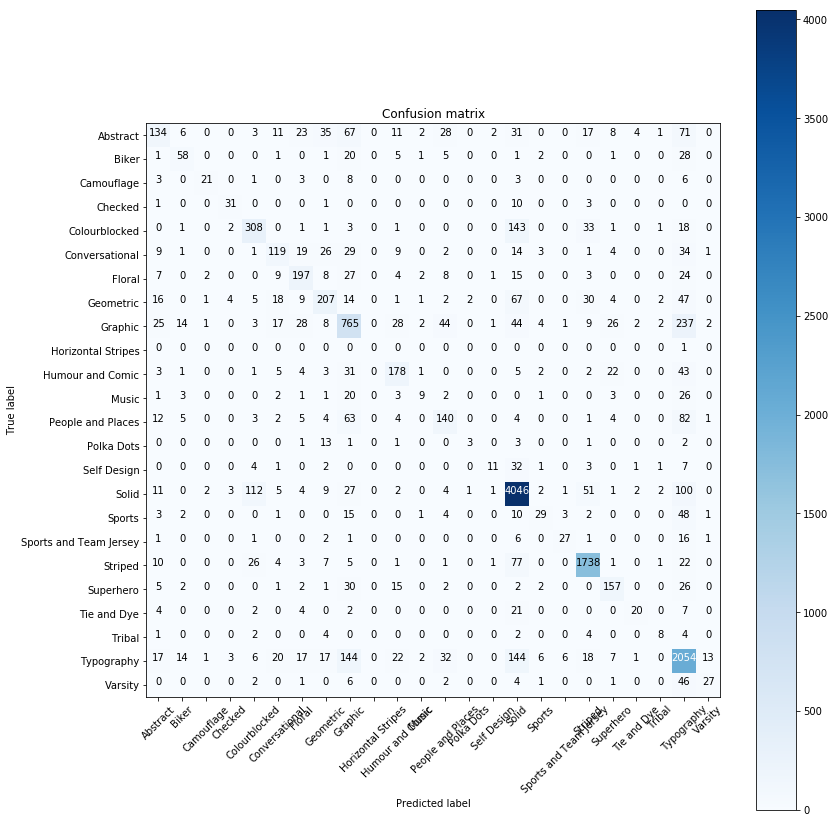

In [14]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

# Dn201 with CenterCrop based on size of initial image

Normalized confusion matrix
[[ 0.29515  0.01322  0.       0.       0.00661  0.02423  0.05066  0.07709  0.14758  0.       0.02423  0.00441
   0.06167  0.       0.00441  0.06828  0.       0.       0.03744  0.01762  0.00881  0.0022   0.15639  0.     ]
 [ 0.00806  0.46774  0.       0.       0.       0.00806  0.       0.00806  0.16129  0.       0.04032  0.00806
   0.04032  0.       0.       0.00806  0.01613  0.       0.       0.00806  0.       0.       0.22581  0.     ]
 [ 0.06667  0.       0.46667  0.       0.02222  0.       0.06667  0.       0.17778  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.       0.       0.       0.       0.13333  0.     ]
 [ 0.02174  0.       0.       0.67391  0.       0.       0.       0.02174  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.06522  0.       0.       0.       0.       0.     ]
 [ 0.       0.00195  0.       0.0039   0.60039  0.       0.00195  0.00195  0.00585  0.       0.001

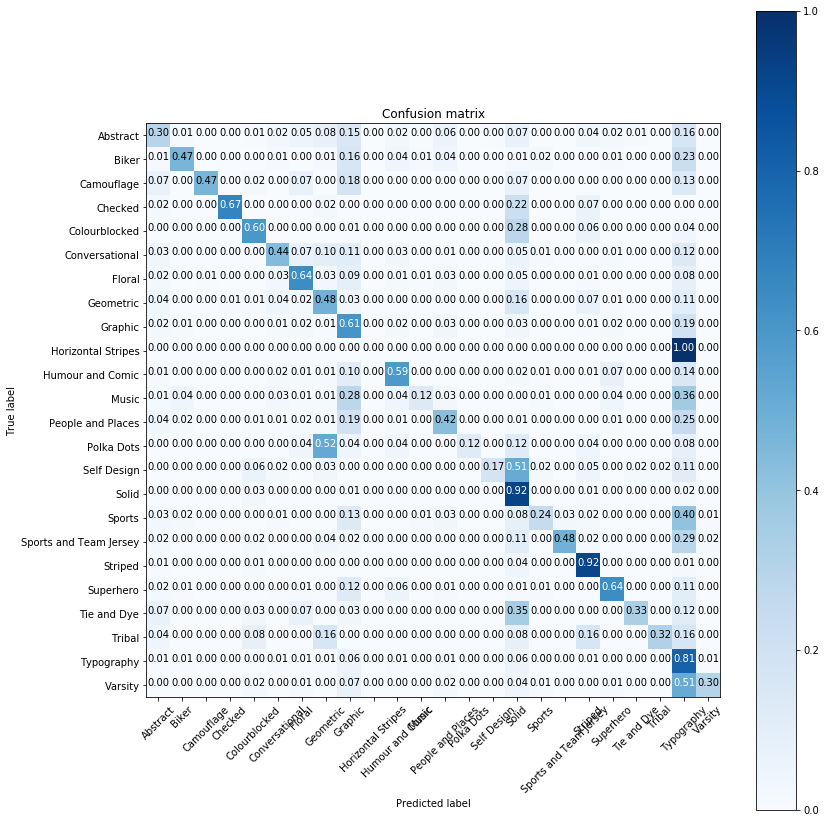

In [15]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [16]:
arch_201=dn201

In [17]:
trn_tfms,val_tfms = tfms_from_model(arch_201,sz,crop_type=CropType.CENTER)

In [18]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [19]:
learn_201 = ConvLearner.pretrained(arch_201,data,precompute=True,ps=0.2)

In [20]:
learn_201.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.072053   0.977025   0.711376  
    1      0.949546   0.934836   0.721525                      
    2      0.87509    0.907948   0.728753                       
    3      0.817958   0.896845   0.733061                       
    4      0.787132   0.884789   0.739778                       



[0.88478929, 0.7397780373831776]

In [21]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.749447   0.893399   0.73934   
    1      0.72652    0.883822   0.742918                       



[0.88382167, 0.74291764018691586]

In [22]:
learn_201.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.675084   0.884194   0.747298  
    1      0.678839   0.888095   0.746568                       



[0.88809472, 0.74656834112149528]

In [23]:
learn_201.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.496427   0.879594   0.749197  
    1      0.507372   0.865814   0.750584                       
    2      0.508375   0.867276   0.750584                       
    3      0.53178    0.868296   0.750292                       
    4      0.49437    0.872071   0.750292                       



[0.87207115, 0.75029205607476634]

In [24]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.501782   0.869769   0.753432  
    1      0.462622   0.868166   0.754673                       



[0.86816591, 0.75467289719626163]

In [25]:
learn_201.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.440458   0.869632   0.752336  
    1      0.481474   0.872478   0.754162                       



[0.87247837, 0.75416179906542058]

In [26]:
learn_201.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.451768   0.870561   0.753797  
    1      0.465544   0.866619   0.754527                       



[0.86661929, 0.75452686915887845]

In [27]:
log_preds_201,y_201 = learn_201.TTA()
probs_201 = np.mean(np.exp(log_preds_201),0)
accuracy_np(probs_201, y_201)
y_201[10]=9
predictions_201 = np.argmax(probs_201,axis=1)
cm_201 = confusion_matrix(y_201, predictions_201)


Confusion matrix, without normalization
[[ 151    2    1    0    4   11   17   39   58    0   10    3   29    0    0   32    4    0   15    5    3
     2   68    0]
 [   6   66    0    0    0    1    1    0   15    0    2    0    2    0    0    2    0    0    0    2    0
     0   27    0]
 [   6    0   22    0    1    0    1    0    7    0    0    0    0    0    0    2    1    0    1    0    0
     0    4    0]
 [   0    0    0   29    0    0    1    2    0    0    0    0    0    1    0    9    0    0    4    0    0
     0    0    0]
 [   2    0    0    0  301    1    0    7    8    0    0    0    1    0    1  142    0    0   35    0    0
     0   15    0]
 [  15    1    1    0    1  127   13   23   30    0    8    0    0    1    0    9    0    0    1    2    0
     0   40    0]
 [  22    0    1    0    0   14  194    3   17    0    3    0    6    0    0   16    0    0    3    0    0
     0   28    0]
 [  29    0    2    0    8   17    5  211   21    0    1    0    2    6    0   55    

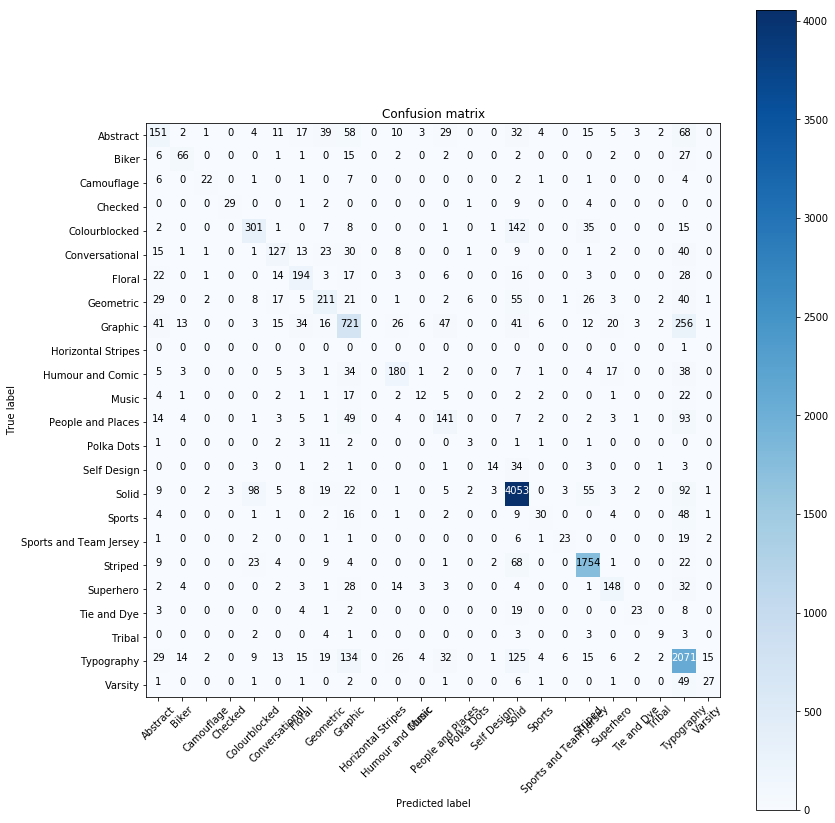

In [28]:
plot_confusion_matrix_mine(cm_201,data.classes,normalize=False)

In [29]:
probs_ensemble = probs_201 + probs

In [30]:
probs_ensemble[:2]

array([[ 0.00023,  0.00001,  0.00001,  0.00002,  0.00003,  0.00053,  0.00008,  0.00062,  0.00036,  0.00003,
         0.00006,  0.00001,  0.00003,  0.00007,  0.00055,  1.99453,  0.00004,  0.     ,  0.00074,  0.00001,
         0.00002,  0.     ,  0.00187,  0.00016],
       [ 0.00342,  0.00018,  0.00015,  0.00014,  0.00313,  0.06095,  0.02001,  0.00706,  0.01312,  0.00018,
         0.00255,  0.00298,  0.00849,  0.00045,  0.00551,  1.50758,  0.00967,  0.00002,  0.01399,  0.00355,
         0.00263,  0.00005,  0.33122,  0.00298]], dtype=float32)

In [31]:
probs_ensemble = probs_ensemble/2

In [32]:
probs_ensemble[:2]

array([[ 0.00011,  0.     ,  0.     ,  0.00001,  0.00002,  0.00027,  0.00004,  0.00031,  0.00018,  0.00001,
         0.00003,  0.     ,  0.00002,  0.00004,  0.00027,  0.99726,  0.00002,  0.     ,  0.00037,  0.     ,
         0.00001,  0.     ,  0.00093,  0.00008],
       [ 0.00171,  0.00009,  0.00008,  0.00007,  0.00156,  0.03048,  0.01001,  0.00353,  0.00656,  0.00009,
         0.00128,  0.00149,  0.00425,  0.00023,  0.00275,  0.75379,  0.00483,  0.00001,  0.00699,  0.00177,
         0.00131,  0.00002,  0.16561,  0.00149]], dtype=float32)

In [33]:
accuracy_np(probs_ensemble, y)


0.76997366110623355

In [34]:
accuracy_np(probs,y)

0.75263388937664621

In [35]:
accuracy_np(probs_201,y_201)

0.75431665203394793

In [36]:
predictions_ensemble = np.argmax(probs_ensemble,axis=1)


In [37]:
cm_ensemble = confusion_matrix(y, predictions_ensemble)


Confusion matrix, without normalization
[[ 142    5    0    0    1    8   23   35   65    0   10    0   25    0    1   32    1    0   17    7    5
     1   76    0]
 [   3   66    0    0    0    1    1    0   14    0    3    0    2    0    0    2    1    0    0    1    0
     0   30    0]
 [   4    0   23    0    1    0    3    0    7    0    0    0    0    0    0    2    0    0    0    0    0
     0    5    0]
 [   1    0    0   31    0    0    0    2    0    0    0    0    0    0    0   10    0    0    2    0    0
     0    0    0]
 [   1    1    0    0  307    1    0    4    5    0    0    0    0    0    0  146    0    0   28    1    0
     1   18    0]
 [  10    1    0    0    1  130   13   22   31    0    8    0    2    0    0   11    0    0    1    2    0
     0   39    1]
 [   9    0    1    0    0   10  205    6   24    0    3    1    4    0    0   14    0    0    2    0    0
     0   28    0]
 [  14    0    2    0    5   16    7  232   11    0    0    0    1    4    0   61    

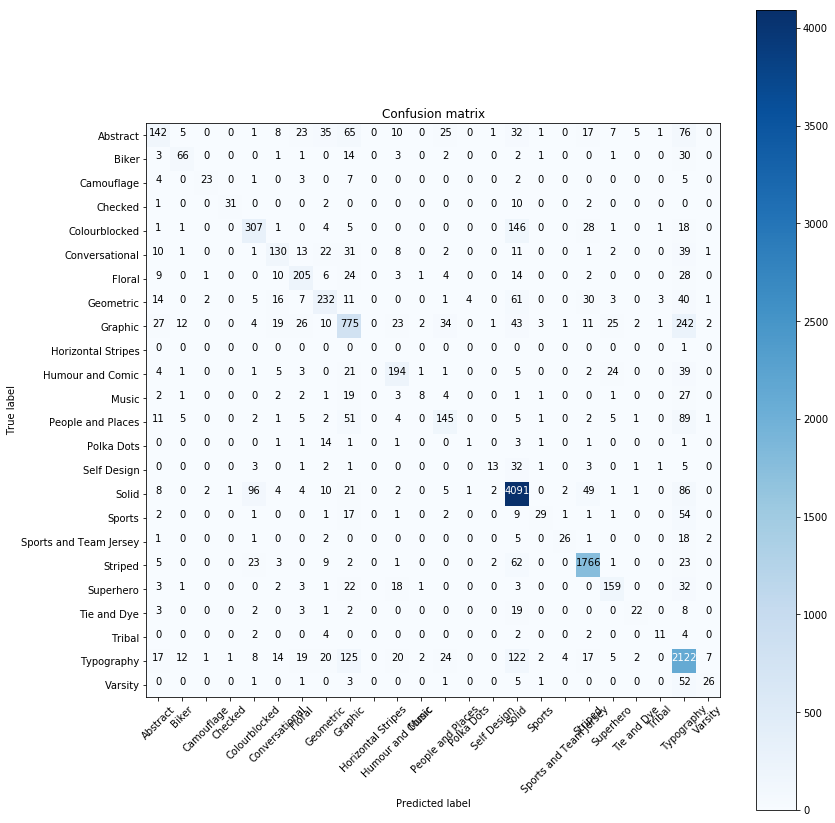

In [38]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.31278  0.01101  0.       0.       0.0022   0.01762  0.05066  0.07709  0.14317  0.       0.02203  0.
   0.05507  0.       0.0022   0.07048  0.0022   0.       0.03744  0.01542  0.01101  0.0022   0.1674   0.     ]
 [ 0.02419  0.53226  0.       0.       0.       0.00806  0.00806  0.       0.1129   0.       0.02419  0.
   0.01613  0.       0.       0.01613  0.00806  0.       0.       0.00806  0.       0.       0.24194  0.     ]
 [ 0.08889  0.       0.51111  0.       0.02222  0.       0.06667  0.       0.15556  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.       0.       0.11111  0.     ]
 [ 0.02174  0.       0.       0.67391  0.       0.       0.       0.04348  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.04348  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.00195  0.       0.       0.59844  0.00195  0.       0.0078   0.00975  0.       0.       0.    

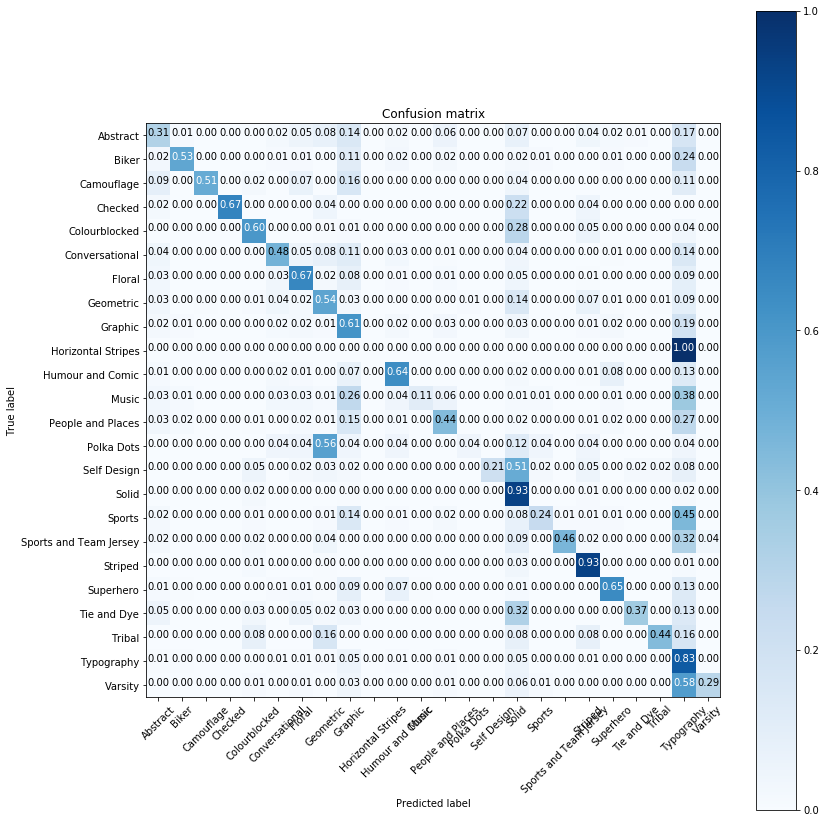

In [39]:
plot_confusion_matrix_mine(cm_ensemble,data.classes,normalize=True)

In [40]:
learn.unfreeze()

In [41]:
learn_201.unfreeze()

In [42]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'


In [43]:
test = open_image(fname)
test= val_tfms((test))
test.shape

(3, 320, 320)

In [44]:
pred_temp = learn.predict_array(test[None])

pred_temp = np.exp(pred_temp)
pred_temp

array([[ 0.00003,  0.     ,  0.00001,  0.00001,  0.00415,  0.0001 ,  0.00002,  0.00092,  0.00015,  0.00004,
         0.     ,  0.     ,  0.00009,  0.00013,  0.00075,  0.97532,  0.00003,  0.00001,  0.00025,  0.     ,
         0.00182,  0.00001,  0.01605,  0.0001 ]], dtype=float32)

In [45]:
data.classes[np.argmax(pred_temp[0,:])]

'Solid'

In [46]:
pred_temp_201 = learn_201.predict_array(test[None])
pred_temp_201 = np.exp(pred_temp_201)
pred_temp_201

array([[ 0.00001,  0.     ,  0.     ,  0.00001,  0.00076,  0.00001,  0.00001,  0.00062,  0.0001 ,  0.     ,
         0.     ,  0.     ,  0.00005,  0.00003,  0.00047,  0.99468,  0.00014,  0.     ,  0.00096,  0.     ,
         0.00001,  0.     ,  0.00211,  0.     ]], dtype=float32)

In [47]:
data.classes[np.argmax(pred_temp_201[0,:])]

'Solid'

In [48]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [49]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [50]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [51]:
arch=resnext50
learn_resnext = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [52]:
learn_resnext.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.167631   1.05569    0.690275  
    1      1.034434   1.006034   0.705315                      
    2      1.02904    0.988086   0.709623                       
    3      0.917895   0.972878   0.71342                       
    4      0.861329   0.971638   0.717582                       



[0.97163832, 0.71758177570093462]

In [53]:
learn_resnext.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.869085   0.955868   0.723788  
    1      0.808056   0.960387   0.724591                       



[0.96038705, 0.72459112149532712]

In [54]:
learn_resnext.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.730836   0.961554   0.729045  
    1      0.748846   0.973783   0.720429                       



[0.9737829, 0.72042932242990654]

In [55]:
learn_resnext.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.573751   0.946022   0.733426  
    1      0.531952   0.952773   0.7362                         
    2      0.538766   0.952116   0.736638                       
    3      0.523388   0.956359   0.73693                        
    4      0.537317   0.957089   0.736565                       



[0.95708913, 0.7365654205607477]

In [56]:
learn_resnext.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.490916   0.95534    0.739194  
    1      0.463304   0.969909   0.735324                       



[0.96990871, 0.73532418224299068]

In [57]:
learn_resnext.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.426808   0.95758    0.739559  
    1      0.45409    0.970746   0.738683                       



[0.97074622, 0.73868282710280375]

In [58]:
learn_resnext.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.453824   0.957426   0.738318  
    1      0.448989   0.967739   0.738902                       
    2      0.419142   0.964225   0.740508                       
    3      0.451032   0.962161   0.739413                       
    4      0.415084   0.964422   0.739924                       



[0.96442163, 0.73992406542056077]

In [59]:
log_preds_resnext,y_resnext = learn_resnext.TTA()
probs_resnext = np.mean(np.exp(log_preds_resnext),0)
accuracy_np(probs_resnext, y_resnext)

0.73975709686859814

In [60]:
y_resnext[10]=9

In [61]:
predictions_resnext = np.argmax(probs_resnext,axis=1)

In [62]:
cm = confusion_matrix(y_resnext, predictions_resnext)

Normalized confusion matrix
[[ 0.24449  0.00441  0.00441  0.       0.00881  0.02203  0.04846  0.07709  0.19163  0.       0.01762  0.0022
   0.04626  0.       0.00661  0.0859   0.00441  0.       0.02423  0.02643  0.01762  0.       0.1652   0.0022 ]
 [ 0.02419  0.5      0.00806  0.       0.       0.01613  0.01613  0.       0.09677  0.       0.02419  0.01613
   0.04839  0.       0.       0.00806  0.       0.       0.       0.01613  0.       0.       0.22581  0.     ]
 [ 0.11111  0.02222  0.46667  0.       0.02222  0.       0.04444  0.       0.2      0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.02222  0.       0.       0.       0.04444  0.     ]
 [ 0.04348  0.       0.       0.52174  0.       0.       0.02174  0.08696  0.02174  0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.1087   0.       0.       0.       0.       0.     ]
 [ 0.0039   0.       0.       0.00195  0.54191  0.00195  0.       0.00975  0.0078   0.       0.0019

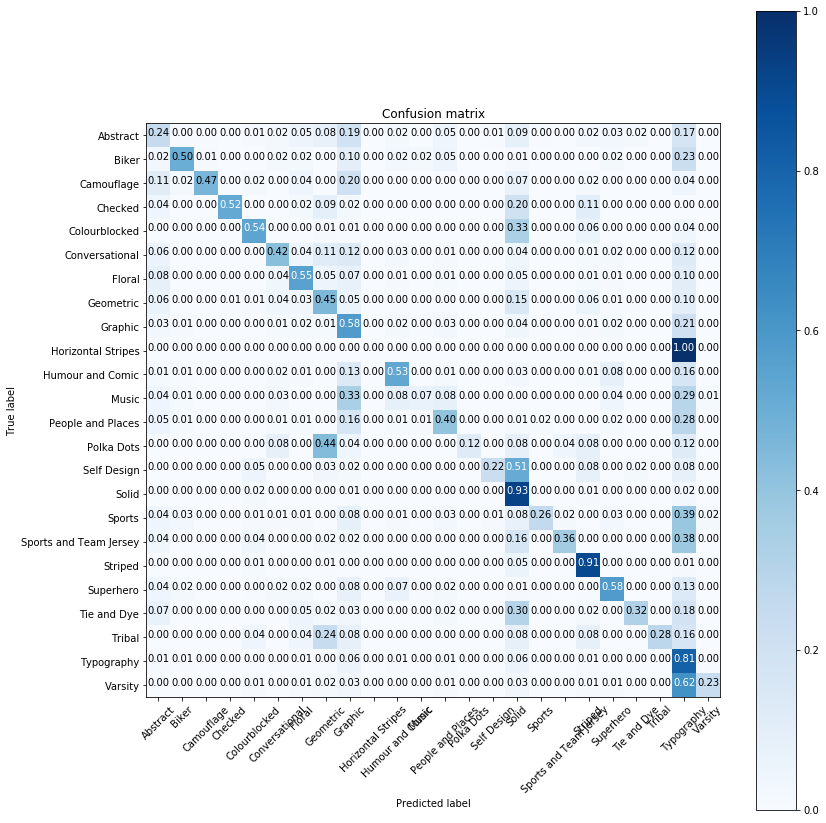

In [63]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# WRN with no crop

In [64]:
arch_wrn = wrn
sz = 320
bs = 32
path='data/hackerearth-myntra'

In [65]:
trn_tfms,val_tfms = tfms_from_model(arch_wrn,sz,crop_type=CropType.NO)

In [66]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [67]:
learn_wrn = ConvLearner.pretrained(arch_wrn,data,precompute=True,ps=0.2)

In [68]:
learn_wrn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      1.140559   1.020346   0.696189  
    1      1.004757   0.968363   0.713785                       
    2      0.935469   0.95244    0.715537                       
    3      0.888263   0.93544    0.724226                       
    4      0.826507   0.922982   0.726124                       



[0.92298234, 0.72612441588785048]

In [69]:
learn_wrn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.794687   0.92696    0.728169  
    1      0.807592   0.92557    0.730432                       



[0.92557025, 0.73043224299065423]

In [70]:
learn_wrn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.743725   0.93727    0.730286  
    1      0.697594   0.932856   0.729118                       



[0.93285632, 0.72911799065420557]

In [71]:
learn_wrn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.602077   0.912582   0.737369  
    1      0.580225   0.906832   0.739924                       
    2      0.580984   0.903143   0.74007                        
    3      0.549141   0.907311   0.741676                       
    4      0.556363   0.907187   0.742334                       



[0.90718734, 0.74233352803738317]

In [72]:
learn_wrn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.537882   0.904378   0.741238  
    1      0.516935   0.908789   0.742699                       



[0.9087891, 0.74269859813084116]

In [73]:
learn_wrn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.530924   0.906915   0.743283  
    1      0.520824   0.903903   0.744232                       



[0.90390259, 0.74423189252336452]

In [74]:
learn_wrn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.50209    0.918801   0.742261  
    1      0.464892   0.912328   0.745181                       



[0.91232771, 0.74518107476635509]

In [75]:
log_preds_wrn,y_wrn = learn_wrn.TTA()


In [76]:
probs_wrn = np.mean(np.exp(log_preds_wrn),0)
accuracy_np(probs_wrn, y_wrn)
y_wrn[10]=9
predictions_wrn = np.argmax(probs_wrn,axis=1)
cm_wrn = confusion_matrix(y_wrn, predictions_wrn)

Confusion matrix, without normalization
[[ 130    2    2    0    4    8   23   37   76    0    8    3   22    0    2   34    6    1   18    5    5
     1   67    0]
 [   4   63    0    0    0    0    1    0   13    0    1    2    6    0    0    2    1    0    0    1    0
     0   30    0]
 [   6    0   21    0    1    0    2    1    6    0    0    0    0    0    0    2    0    0    2    0    0
     0    4    0]
 [   2    0    0   28    0    0    0    3    0    0    0    0    0    0    0   10    0    0    3    0    0
     0    0    0]
 [   2    0    0    1  298    1    0    5    6    0    1    1    0    0    0  147    1    1   28    0    1
     0   20    0]
 [  10    0    0    0    1  118   18   24   24    0    9    0    3    0    0   17    0    0    2    1    0
     0   44    1]
 [  23    0    1    0    1   11  180    6   27    0    3    0    4    0    0   13    1    0    2    0    0
     0   35    0]
 [  29    0    1    1   12   17    6  202   17    0    0    1    2    1    0   58    

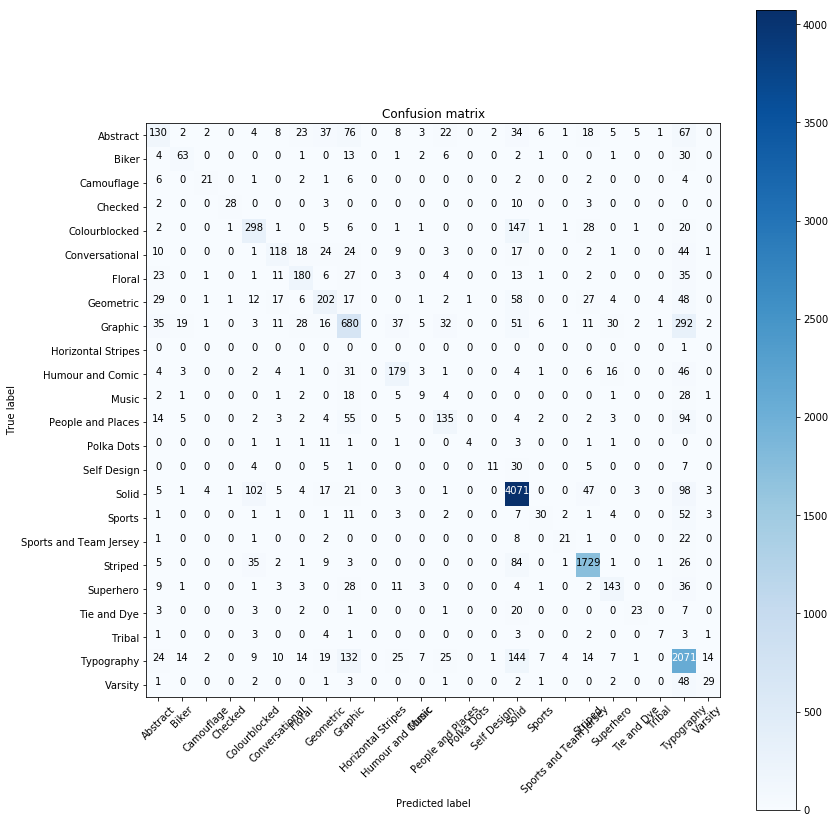

In [77]:
plot_confusion_matrix_mine(cm_wrn,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.28634  0.00441  0.00441  0.       0.00881  0.01762  0.05066  0.0815   0.1674   0.       0.01762  0.00661
   0.04846  0.       0.00441  0.07489  0.01322  0.0022   0.03965  0.01101  0.01101  0.0022   0.14758  0.     ]
 [ 0.03226  0.50806  0.       0.       0.       0.       0.00806  0.       0.10484  0.       0.00806  0.01613
   0.04839  0.       0.       0.01613  0.00806  0.       0.       0.00806  0.       0.       0.24194  0.     ]
 [ 0.13333  0.       0.46667  0.       0.02222  0.       0.04444  0.02222  0.13333  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.04444  0.       0.       0.       0.08889  0.     ]
 [ 0.04348  0.       0.       0.6087   0.       0.       0.       0.06522  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.06522  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.       0.       0.00195  0.5809   0.00195  0.       0.00975  0.0117   0.       0.001

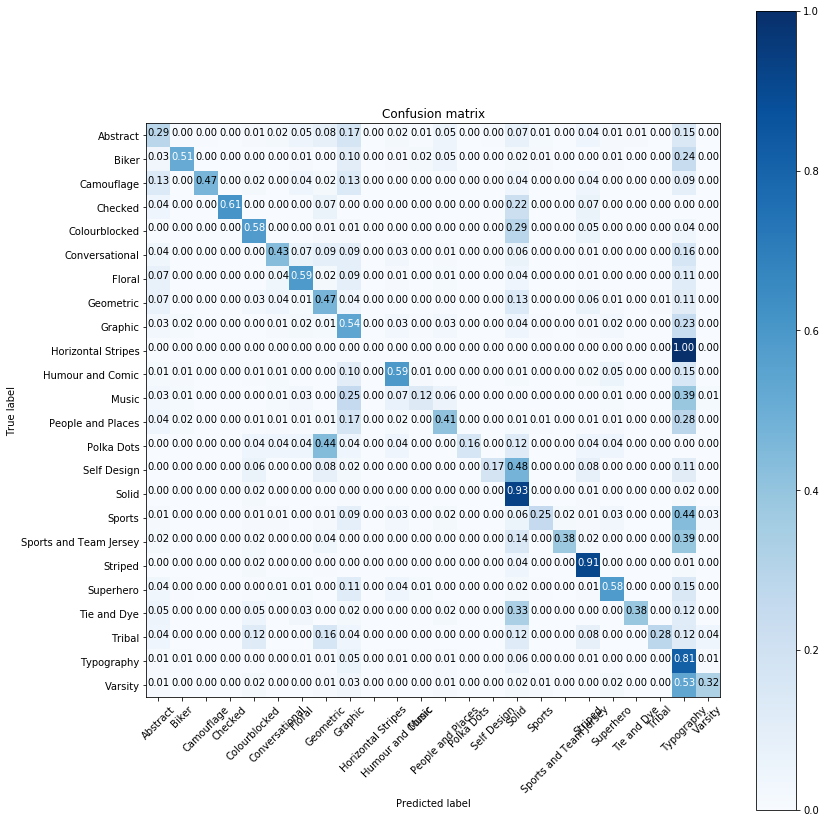

In [78]:
plot_confusion_matrix_mine(cm_wrn,data.classes,normalize=True)

In [79]:
ensemble_three = probs_wrn+ probs_resnext + probs + probs_201

In [80]:
ensemble_three[:4]

array([[ 0.00433,  0.00003,  0.00011,  0.00004,  0.00011,  0.00249,  0.00032,  0.00096,  0.00248,  0.00003,
         0.00012,  0.00004,  0.00006,  0.00025,  0.00576,  3.9647 ,  0.00024,  0.     ,  0.0013 ,  0.00004,
         0.00007,  0.00001,  0.0162 ,  0.00029],
       [ 0.00511,  0.00028,  0.00018,  0.00021,  0.0057 ,  0.06357,  0.02148,  0.01017,  0.01387,  0.0002 ,
         0.0031 ,  0.00303,  0.00875,  0.00065,  0.00742,  3.44994,  0.01158,  0.00006,  0.02199,  0.00381,
         0.00591,  0.0001 ,  0.35983,  0.00306],
       [ 0.00022,  0.00002,  0.00003,  0.00001,  0.00007,  0.00055,  0.00002,  0.00015,  0.00136,  0.     ,
         0.00007,  0.00002,  0.00066,  0.00002,  0.00018,  0.01077,  0.00044,  0.00001,  0.00019,  0.00001,
         0.00002,  0.     ,  3.98437,  0.00084],
       [ 0.00022,  0.00002,  0.00003,  0.00001,  0.00007,  0.00055,  0.00002,  0.00015,  0.00136,  0.     ,
         0.00007,  0.00002,  0.00066,  0.00002,  0.00018,  0.01077,  0.00044,  0.00001,  0.00019,

In [81]:
ensemble_three = ensemble_three/4

In [82]:
accuracy_np(ensemble_three,y_resnext)

0.77619256657887037

In [83]:
predictions_ensemble_three = np.argmax(ensemble_three,axis=1)

In [84]:
predictions_ensemble

array([15, 15, 22, ..., 15, 15, 15])

In [85]:
cm = confusion_matrix(y_wrn, predictions_ensemble)

Normalized confusion matrix
[[ 0.31278  0.01101  0.       0.       0.0022   0.01762  0.05066  0.07709  0.14317  0.       0.02203  0.
   0.05507  0.       0.0022   0.07048  0.0022   0.       0.03744  0.01542  0.01101  0.0022   0.1674   0.     ]
 [ 0.02419  0.53226  0.       0.       0.       0.00806  0.00806  0.       0.1129   0.       0.02419  0.
   0.01613  0.       0.       0.01613  0.00806  0.       0.       0.00806  0.       0.       0.24194  0.     ]
 [ 0.08889  0.       0.51111  0.       0.02222  0.       0.06667  0.       0.15556  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.       0.       0.       0.       0.11111  0.     ]
 [ 0.02174  0.       0.       0.67391  0.       0.       0.       0.04348  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.04348  0.       0.       0.       0.       0.     ]
 [ 0.00195  0.00195  0.       0.       0.59844  0.00195  0.       0.0078   0.00975  0.       0.       0.    

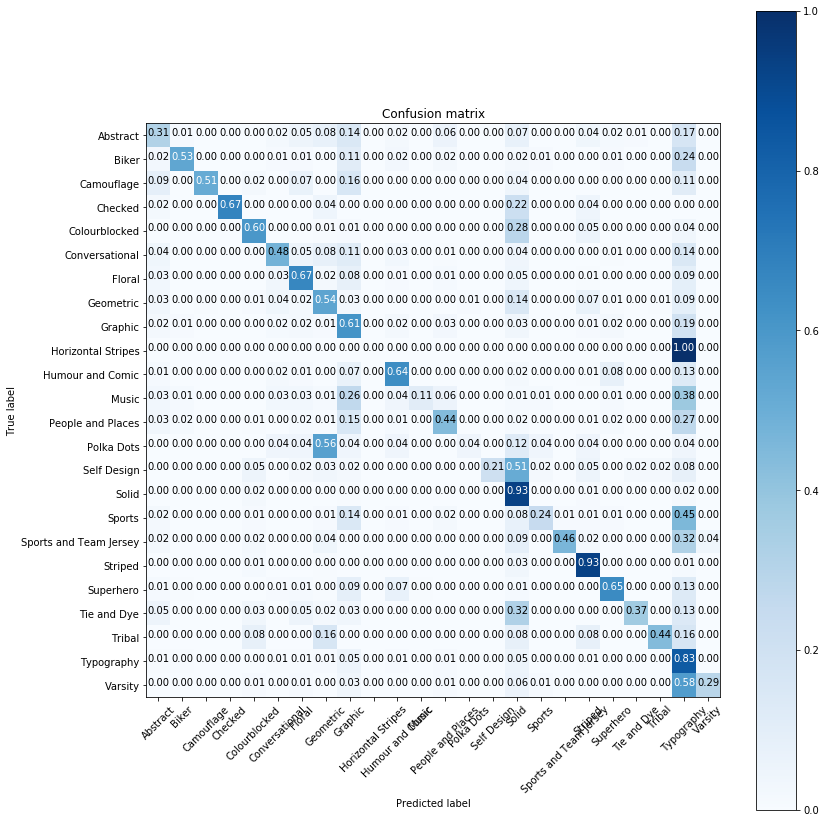

In [86]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [87]:
learn_wrn.unfreeze()

In [88]:
learn_resnext.unfreeze()

In [91]:
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        
        pred_one = learn.predict_array(img[None])
        pred_two = learn_201.predict_array(img[None])
        pred_three = learn_resnext.predict_array(img[None])
        pred_four = learn_wrn.predict_array(img[None])
        pred_ensemble = (pred_one + pred_two+pred_three+pred_four)/4
        pred_ensemble = np.exp(pred_ensemble)
        temp_data = data.classes[np.argmax(pred_ensemble)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'

In [90]:
df.to_csv('myntra-ensemble-four.csv',index=False)